In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("/content/iris (2).data" ,header= None)


In [3]:
df.head(10)        # print first 10 rows

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df_headers =['Sepalwidth','SepalLength','PetalLength','PetalWidth','Species']
df.to_csv("Iris.csv",header=df_headers,index=False)

In [6]:
ndf=pd.read_csv("Iris.csv")

In [7]:
ndf.head(5)

,Sepalwidth,SepalLength,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# to find info of data


In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sepalwidth   150 non-null    float64
 1   SepalLength  150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
 ndf.describe()

,Sepalwidth,SepalLength,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
ndf.tail()   #it will print the last 5 rows

,Sepalwidth,SepalLength,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
ndf.isnull().sum()           # to count the null values in dataset

Sepalwidth     0
SepalLength    0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [13]:
ndf.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

***Plotting a Graph***

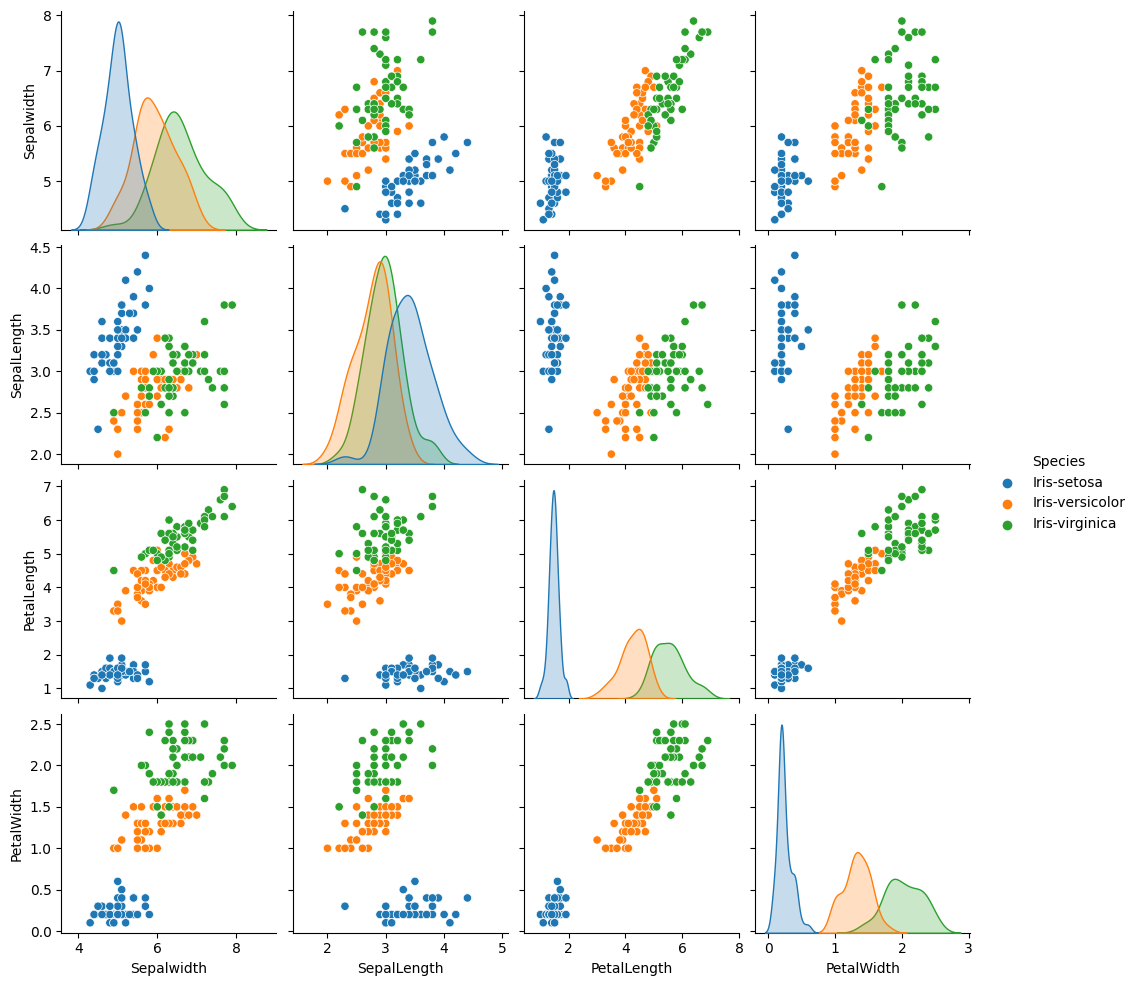

In [14]:
sns.pairplot(data=ndf , hue="Species")
plt.show()

<Axes: xlabel='Species', ylabel='Sepalwidth'>

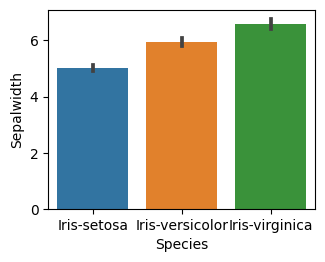

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(5,5,2)
sns.barplot(x='Species',y='Sepalwidth',data=ndf)

<Axes: xlabel='Species', ylabel='PetalWidth'>

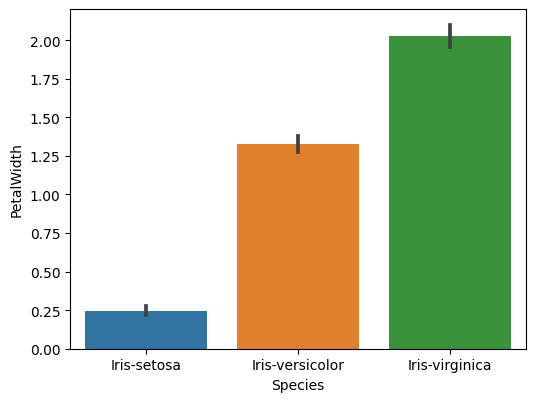

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,2)
sns.barplot(x='Species',y='PetalWidth',data=ndf)

<Axes: xlabel='Species', ylabel='SepalLength'>

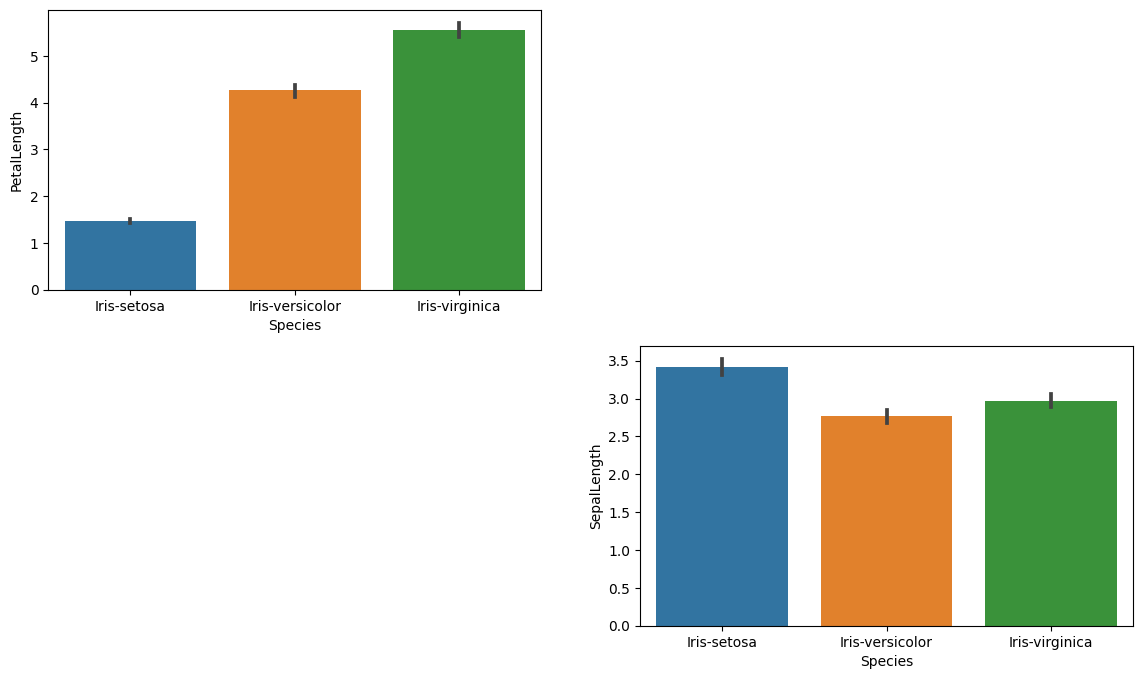

In [17]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.barplot(x='Species',y='PetalLength',data=ndf)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='SepalLength',data=ndf)

In [18]:
#defining independent and dependent variables
X=ndf.drop(columns="Species")
y=ndf["Species"]

Split Data into TRAIN and TEST data

In [19]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

Using Random Forest Classifier Algorithm

In [20]:
from sklearn.ensemble import RandomForestClassifier
cf =RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=0)
cf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

Confusion Matrix Formation

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred =cf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [22]:
print(cm)

[[24  0  0]
 [ 0 24  0]
 [ 0  5 22]]


In [23]:
accuracy_score(y_test,y_pred)

0.9333333333333333

CONCLUDE : Hence the Accuracy for IRIS datasets is 93% using Random Forest Algorithm